In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

def lax_wendroff(u, c=.4): 
    tmp = c/2.0*(1+c)*u[:-2] + (1-c**2)*u[1:-1] - c/2.0*(1-c)*u[2:]
    return tmp


In [4]:
cfl = .4
a = 1.
M = 100
xgrid = np.linspace(-1,1,M)
dx = xgrid[1] - xgrid[0]
dt = cfl*dx/a
T = 2

In [5]:
tsteps = int(T / dt)
U = np.zeros((M, tsteps))
U[:,0] = np.sin(np.pi*xgrid)
for i in range(tsteps-1):
    U[1:-1,i+1] = lax_wendroff(U[:,i], c=cfl)
    U[0,i+1] = cfl/2.0*(1+cfl)*U[-1,i] + (1-cfl**2)*U[0,i] - cfl/2.0*(1-cfl)*U[1,i]
    U[-1,i+1] = cfl/2.0*(1+cfl)*U[-2,i] + (1-cfl**2)*U[-1,i] - cfl/2.0*(1-cfl)*U[0,i]


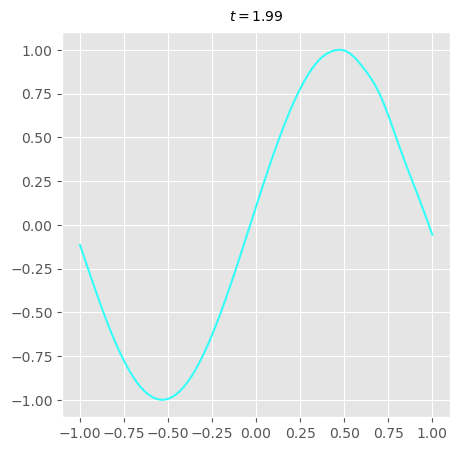

In [9]:
import matplotlib.animation as animation
plt.style.use('ggplot')
fig, ax = plt.subplots(1,1,figsize=(5,5))
artists = []
for i in range(tsteps):
    ln, = ax.plot(xgrid, U[:,i], color='#33FFF8')
    ann = ax.annotate(f'$t={dt*i:.2f}$', xy=(.5,1.03), xycoords='axes fraction', ha='center')
    artists.append([ln, ann])
ani = animation.ArtistAnimation(fig, artists, interval=100, blit=True)
writer = animation.FFMpegWriter(fps=60)
ani.save('LW_test.mp4', writer=writer)